### Lab | Imbalanced data

We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.
Instructions

    Load the dataset and explore the variables.
    We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
    Extract the target variable.
    Extract the independent variables and scale them.
    Build the logistic regression model.
    Evaluate the model.
    Even a simple model will give us more than 70% accuracy. Why?
    Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
    Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [2]:
#Load the dataset and explore the variables.

churnData = pd.read_csv('files_for_lab/customer_churn.csv')
churnData.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
    

In [3]:
#    Extract the target variable.

y = pd.DataFrame(churnData['Churn'])

display(y)

y = pd.DataFrame(np.where(y['Churn'] == 'Yes',1,0))
y.columns = ['Churn']
display(y)

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [4]:
data_f = churnData[['tenure','SeniorCitizen','MonthlyCharges']]

data_f

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [5]:
#checking data types of the columns
display(data_f.dtypes)
display(data_f.describe())
display(data_f.isna().sum())
# so we have no empty fields in the data

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


tenure            0
SeniorCitizen     0
MonthlyCharges    0
dtype: int64

In [6]:
data_f['tenure'].value_counts()

# Looking at the value count results of tenure, it looks like it is equally distributed. Let's see the distribution plot.


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [7]:
data_f['SeniorCitizen'].value_counts()

# Looking at the value count results of SeniorCitizen, it looks like it is imbalanced


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [8]:
data_f['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [9]:
y.value_counts()


Churn
0        5174
1        1869
dtype: int64

C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


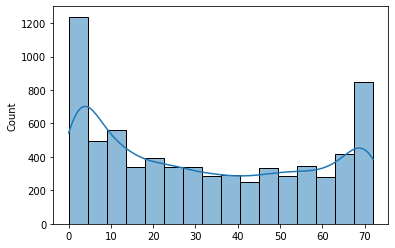

C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


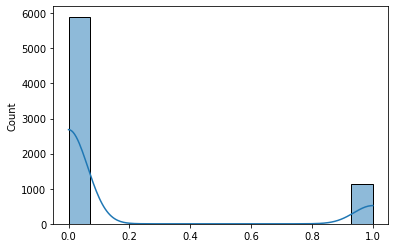

C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Borja\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


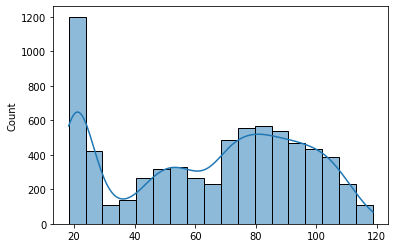

In [10]:
sns.histplot(np.array(data_f['tenure']),kde=True)
plt.show()
sns.histplot(np.array(data_f['SeniorCitizen']),kde=True)
plt.show()
sns.histplot(np.array(data_f['MonthlyCharges']),kde=True)
plt.show()

So, none of them seem to have anything close to a normal distribution. Of course, SeniorCitizen has only 2 possibilities but the others could be normal and they aren't. I would say then good candidates for a transformation after a visual inspection but let's do the other tests

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


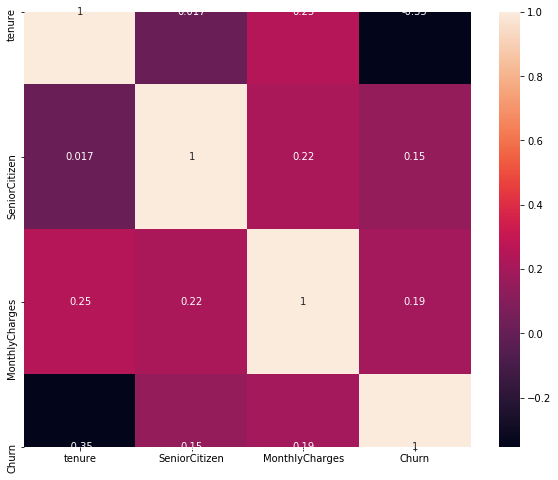

In [11]:
# to see how all variables (dependent and independent) correlate to each other, 
# we will build the test DataFrame and check the correlation

test = pd.concat([data_f,y], axis=1, sort=False)
display(test)
corr_matrix=test.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
# Churn exhibits a relative high correlation with tenure. 
# The correlation with the other two variables seems to be weaker.
# There is some correlation between the Monthly Charges and the SeniorCitizen status
# but not that high that we could think that one is providing the same information as the other

In [12]:
# testing skewness 
display('Skewness')
display(data_f.skew())
# Skewness is within the range [-2,2]

# and Kurtosis
display('Kurtosis')
display(data_f.kurtosis())

# also within the range... so we won't apply any transformation initially at least.

'Skewness'

tenure            0.239540
SeniorCitizen     1.833633
MonthlyCharges   -0.220524
dtype: float64

'Kurtosis'

tenure           -1.387372
SeniorCitizen     1.362596
MonthlyCharges   -1.257260
dtype: float64

In [13]:
"""transformer = PowerTransformer()
x_power = transformer.fit_transform(data_f)
x_power = pd.DataFrame(x_power)
x_power.columns = data_f.columns

"""
#We don't apply the  transformer to the dependent value because it has only 0 and 1 values... 
# I don't think it makes sense to change this. Let's see!


'transformer = PowerTransformer()\nx_power = transformer.fit_transform(data_f)\nx_power = pd.DataFrame(x_power)\nx_power.columns = data_f.columns\n\n'

In [14]:
# Let's see how the distributions look like now
"""
sns.histplot(np.array(x_power['tenure']),kde=True)
plt.show()
sns.histplot(np.array(x_power['SeniorCitizen']),kde=True)
plt.show()
sns.histplot(np.array(x_power['MonthlyCharges']),kde=True)
plt.show()
"""

"\nsns.histplot(np.array(x_power['tenure']),kde=True)\nplt.show()\nsns.histplot(np.array(x_power['SeniorCitizen']),kde=True)\nplt.show()\nsns.histplot(np.array(x_power['MonthlyCharges']),kde=True)\nplt.show()\n"

In [15]:
#x_power.skew()

In [16]:
# Let's calculate the logistic regression
X_train, X_test, y_train, y_test = train_test_split(data_f, y, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.78 


C:\Users\Borja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [17]:
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.39 


### Even a simple model will give us more than 70% accuracy. Why?
    => there is an imbalance in the y variable as well (74% to 26%), this means that picking yes, would be right in 74% of the cases.

### 8
Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors 
that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
Build and evaluate the logistic regression model. Is it there any improvement?

In [18]:
smote = SMOTE()

transformer = StandardScaler().fit(data_f)
X = transformer.transform(data_f)
X_sm, y_sm = smote.fit_sample(X, y)
y_sm.value_counts()

Churn
1        5174
0        5174
dtype: int64

In [19]:
# Let's calculate the logistic regression after applying Smote
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.75 


C:\Users\Borja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [20]:
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.49 


### applying smote, reduces the accuracy but increases the kappa value

# 9 
    Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. 
    Build and evaluate the logistic regression model. Is it there any improvement?

In [23]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_sample(data_f, y)
display(y_tl.value_counts())

X_tl2, y_tl2 = tl.fit_sample(X_tl, y_tl)
display(y_tl2.value_counts())

C:\Users\Borja\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


Churn
0        4711
1        1869
dtype: int64

Churn
0        4575
1        1869
dtype: int64

In [24]:
# Let's calculate the logistic regression after applying Smote
X_train, X_test, y_train, y_test = train_test_split(X_tl2, y_tl2, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.80 


C:\Users\Borja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.46 


In [26]:
# Can we apply smote after we have applied tomek links? Will we get better results?

X_sm, y_sm = smote.fit_sample(X_tl2, y_tl2)
y_sm.value_counts()

Churn
1        4575
0        4575
dtype: int64

In [27]:
# Let's calculate the logistic regression after applying Smote
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.74 


C:\Users\Borja\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
print("The kappa of the logistic regression model is: %4.2f " %(cohen_kappa_score(y_pred,y_test)) )

The kappa of the logistic regression model is: 0.49 


## hmm... applying smote after having applied tomek links before, does not produce better results